The programs have following functions:
1. **LoadImages(directory)** ->This is used to load the images from the given directory
2. **PCAAlgo(trainDir, testDir,KDIM)** -> This is used to reduce the dimentionality of the data using PCA
3. **plotgraph(svm_output,kernel,e)** -> This is used to plot the heatmaps
4. **SVMAlgo(training_data,testing_data, kernel, lam, K,e )** -> This is the SVM algorithm to build the SVM classifier model
5. **LDAAlgo(training_data,testing_data)** -> This is the LDA algorithm to build LDA classifier model

In [5]:
import os
from PIL import Image
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from numpy import asarray
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

def LoadImages(directory):
    Data_Samples=np.array([])
    label=[]
    flag=0
    for fname in os.scandir(directory):
        if fname.is_file():
            if str(fname).count("gif") == 0:
                continue
            fname = str(fname.path).split("/")[-1]
            img = asarray(Image.open(directory + "/" + fname), dtype=float)
            img = np.reshape(img, (1, img.shape[0]*img.shape[0]))
            if flag==0:
                Data_Samples = np.array(img, copy=True)
                flag=1
            else:
                Data_Samples = np.vstack((Data_Samples, img))
            if "sad" in fname:
                label.append(0)
            if "happy" in fname:
                label.append(1)
    return Data_Samples,label


def PCAAlgo(trainDir, testDir,KDIM):
    Original_Data_Samples,labels=LoadImages(trainDir)
    Test_Data,Test_Labels=LoadImages(testDir)
    pca = PCA(n_components=KDIM,whiten=True)
    pca.fit(Original_Data_Samples)
    train_data = {"data": pca.transform(Original_Data_Samples), "label": labels}
    test_data = {"data": pca.transform(Test_Data), "label": Test_Labels}
    return train_data,test_data

def plotgraph(svm_output,kernel,e):
    plt.subplots(figsize=(8, 8))
    df = pd.DataFrame(svm_output, index=list(range(1,20,2)), columns=list(range(1,10)))
    sns.heatmap(df, cmap="Blues", linewidth=1, annot=True)
    plt.xlabel("C values")
    plt.ylabel("K values")
    plt.title(label="SVM with "+kernel+" Kernel and "+"Tolerance="+str(e), fontweight=10, pad='2.0')
    plt.show()

def SVMAlgo(training_data,testing_data, kernel, lam, K,e ):
    classifier = svm.SVC(C = lam,kernel=kernel,tol=e)
    classifier.fit(training_data["data"], training_data["label"])
    return classifier.score(testing_data["data"], testing_data["label"])

def LDAAlgo(training_data,testing_data):
    lda = LDA()
    lda.fit_transform(training_data["data"], training_data["label"])
    a = lda.score(testing_data["data"], testing_data["label"])
    return a

# **Loading the Data Samples and Applying PCA to them**

In [6]:
proj_train_data = {}
proj_test_data = {}
for K in range(1, 20):
    training_data, testing_data = PCAAlgo('Data/emotion_classification/train', 'Data/emotion_classification/test', K)
    proj_train_data.update({K: training_data})
    proj_test_data.update({K: testing_data})

# **Applying the SVM Classifier**

Following are the Accuracy scores of SVM classifiers on the test data :



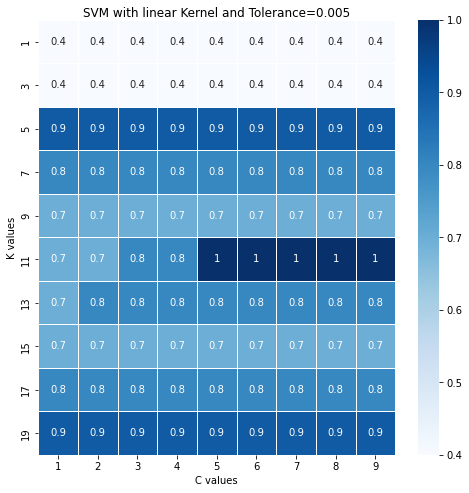

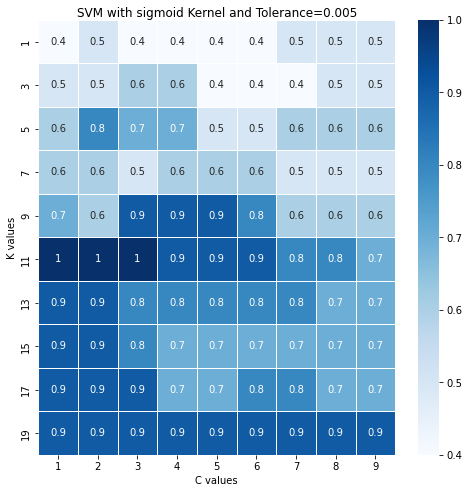

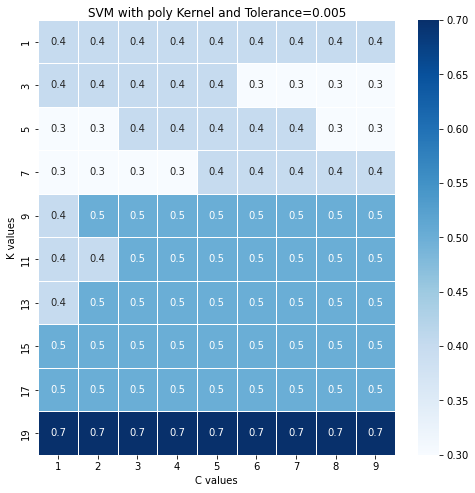

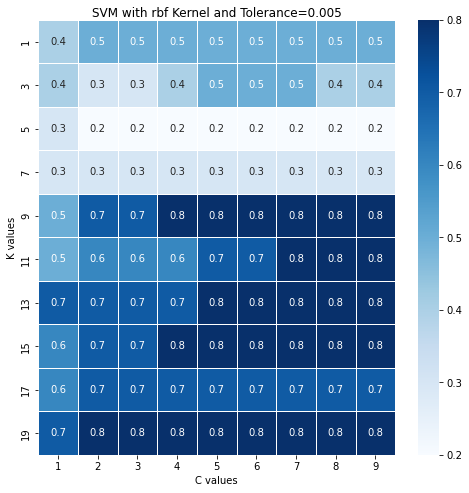

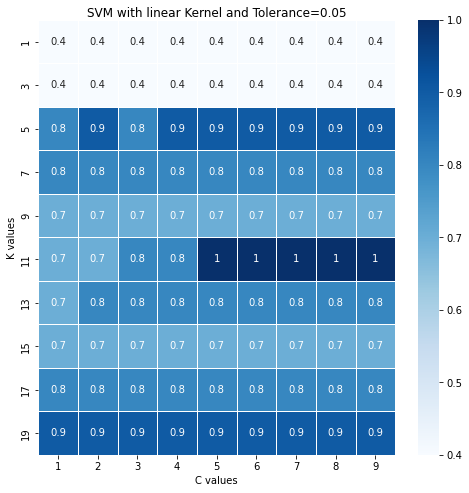

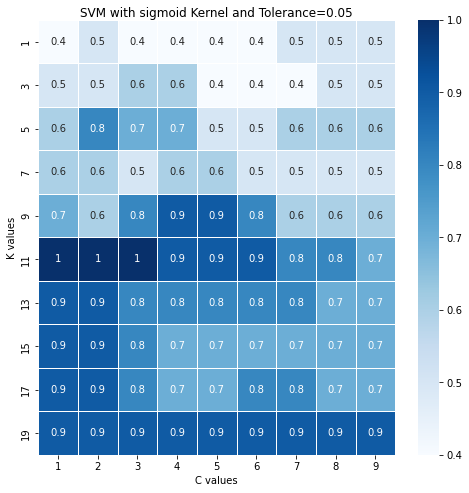

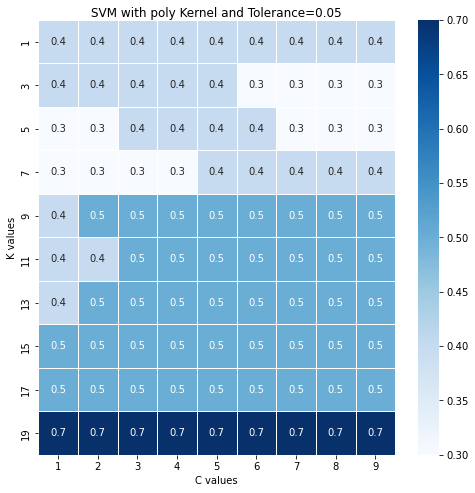

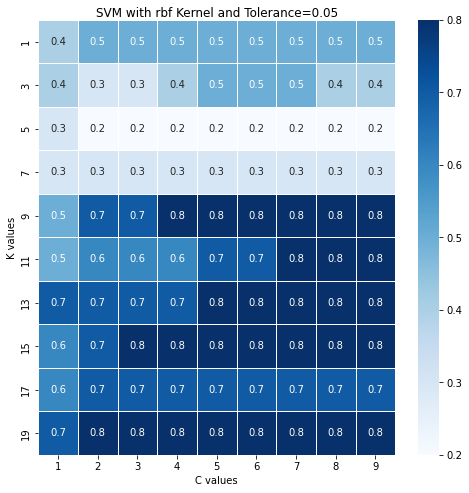

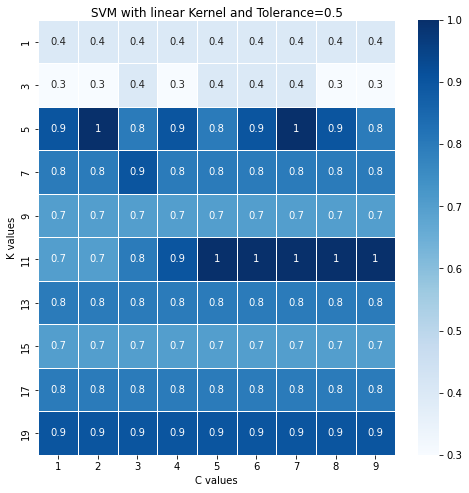

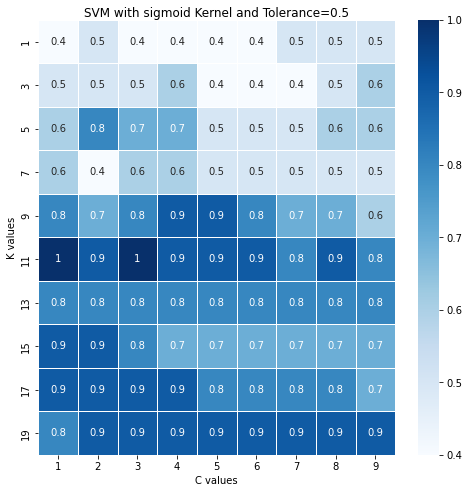

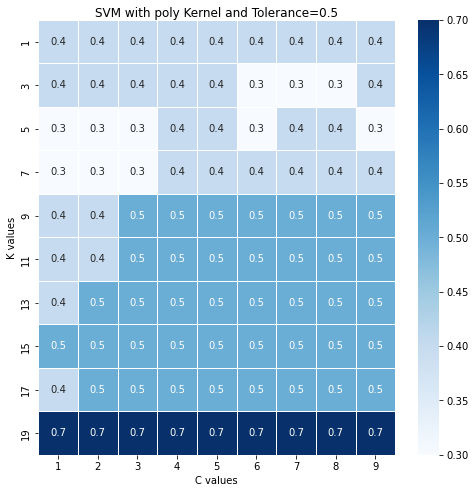

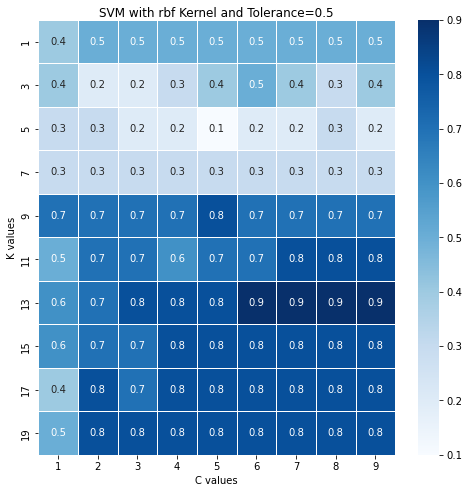

In [7]:
kernels=["linear","sigmoid","poly","rbf"]
print("Following are the Accuracy scores of SVM classifiers on the test data :")
print("")
E=[0.005,0.05,0.5]
for e in E:
    for kernel in kernels:
        svm_output = []
        for K in range(1, 20, 2):
            svm_accuracy = []
            for C in range(1, 10):
                svm_accuracy.append(SVMAlgo(proj_train_data[K], proj_test_data[K], kernel, C, K,e))
            svm_output.append(svm_accuracy)
        plotgraph(svm_output,kernel,e)

# **Applying the LDA Classifier**

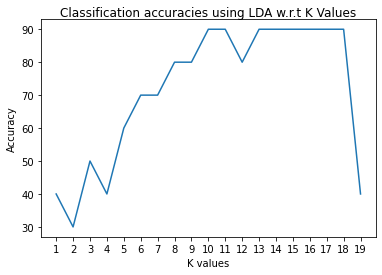

In [8]:
lda_output = []
for K in range(1, 20):
    lda_output.append(LDAAlgo(proj_train_data[K], proj_test_data[K])*100)
    
plt.plot(list(range(1, 20)),lda_output)
plt.title(label="Classification accuracies using LDA w.r.t K Values", fontweight=10, pad='2.0')
plt.xticks(np.arange(1,20))
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()
    
